# Q3

In [1]:
import pandas as pd

# Creating the DataFrame
data = pd.DataFrame({
    'salary': [1.7, 2.4, 2.3, 3.1, 3.7, 4.2, 4.4, 6.1, 5.4, 5.7, 6.4, 6.2],
    'experience': [1.2, 1.5, 1.9, 1.2, 2.4, 2.5, 2.8, 3.1, 3.3, 3.7, 4.2, 4.4]
})

# Saving the DataFrame to a CSV file
data.to_csv('salary_experience.csv', index=False)


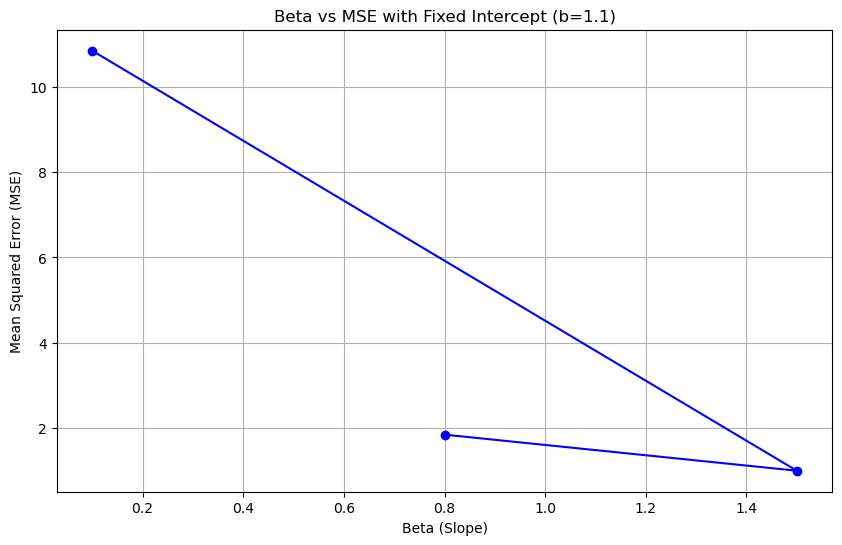

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('salary_experience.csv')
X = data['experience'].values
y = data['salary'].values

# Fixed intercept
b = 1.1

# Beta values to test
betas = [0.1, 1.5, 0.8]
mse_list = []

for beta in betas:
    # Predicted salaries
    y_pred = beta * X + b
    # Calculate MSE
    mse = np.mean((y - y_pred) ** 2)
    mse_list.append(mse)

# Plot beta vs MSE
plt.figure(figsize=(10, 6))
plt.plot(betas, mse_list, 'o-', color='blue')
plt.xlabel('Beta (Slope)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Beta vs MSE with Fixed Intercept (b=1.1)')
plt.grid(True)
plt.show()


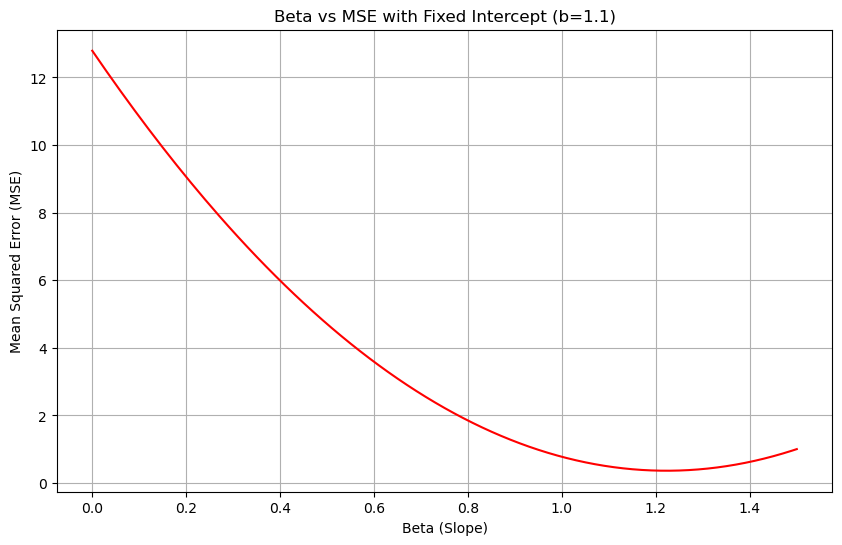

In [3]:
# Define beta range
beta_range = np.arange(0, 1.51, 0.01)
mse_list = []

for beta in beta_range:
    # Predicted salaries
    y_pred = beta * X + b
    # Calculate MSE
    mse = np.mean((y - y_pred) ** 2)
    mse_list.append(mse)

# Plot beta vs MSE
plt.figure(figsize=(10, 6))
plt.plot(beta_range, mse_list, color='red')
plt.xlabel('Beta (Slope)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Beta vs MSE with Fixed Intercept (b=1.1)')
plt.grid(True)
plt.show()

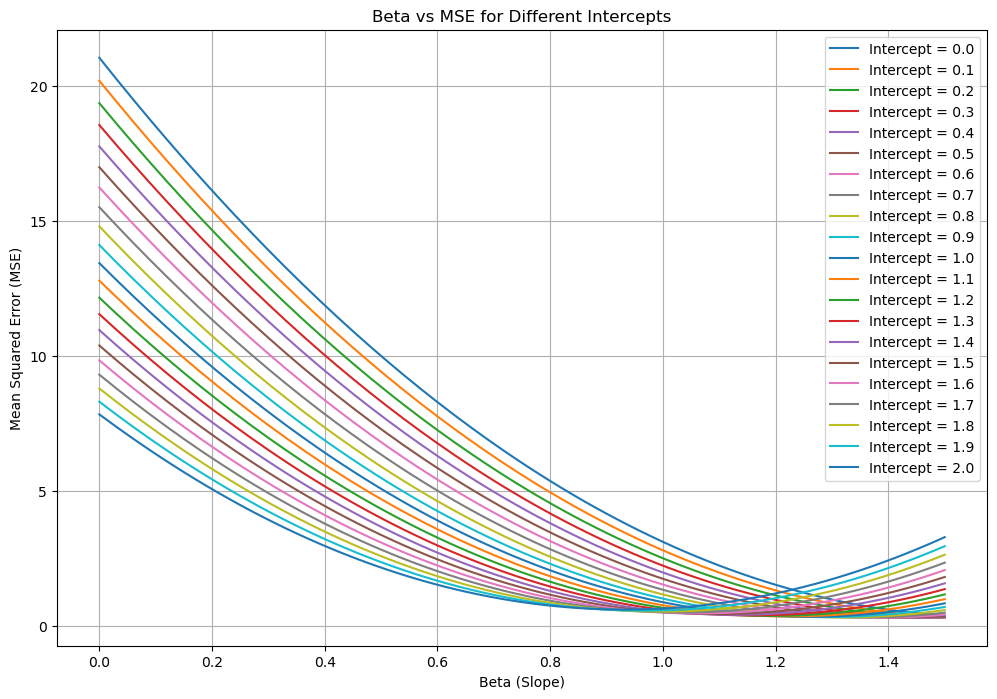

In [4]:
# Define beta and intercept ranges
intercepts = np.arange(0, 2.1, 0.1)
beta_range = np.arange(0, 1.51, 0.01)
mse_matrix = np.zeros((len(intercepts), len(beta_range)))

for i, b in enumerate(intercepts):
    for j, beta in enumerate(beta_range):
        # Predicted salaries
        y_pred = beta * X + b
        # Calculate MSE
        mse = np.mean((y - y_pred) ** 2)
        mse_matrix[i, j] = mse

# Plot beta vs MSE for different intercepts
plt.figure(figsize=(12, 8))
for i, b in enumerate(intercepts):
    plt.plot(beta_range, mse_matrix[i, :], label=f'Intercept = {b:.1f}')

plt.xlabel('Beta (Slope)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Beta vs MSE for Different Intercepts')
plt.legend()
plt.grid(True)
plt.show()


Sklearn Beta (Slope): 1.42
Sklearn Intercept: 0.50
Sklearn Mean Squared Error (MSE): 0.3145


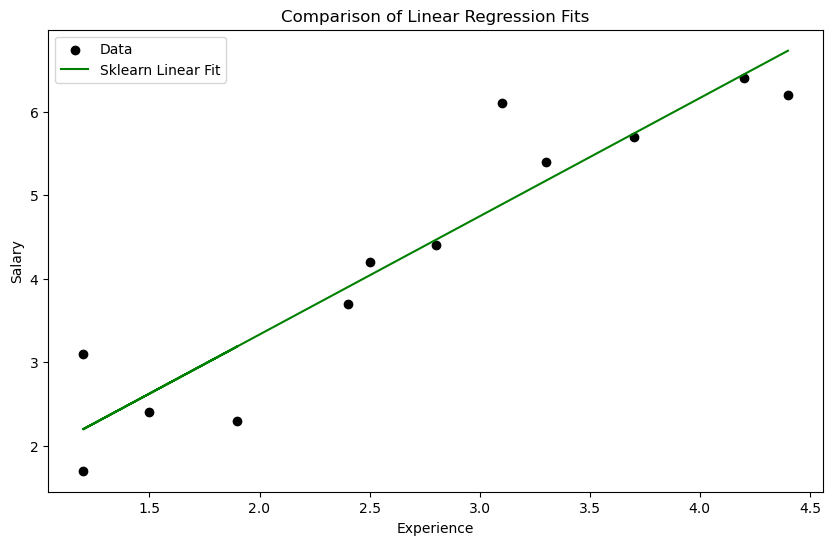

In [5]:
from sklearn.linear_model import LinearRegression

# Prepare data for sklearn
X_reshape = X.reshape(-1, 1)  # sklearn expects 2D array for features

# Create and fit the model using sklearn
model = LinearRegression()
model.fit(X_reshape, y)

# Get the coefficients
beta_sklearn = model.coef_[0]  # Slope
intercept_sklearn = model.intercept_  # Intercept

# Predictions and MSE
y_pred_sklearn = model.predict(X_reshape)
mse_sklearn = np.mean((y - y_pred_sklearn) ** 2)

print(f"Sklearn Beta (Slope): {beta_sklearn:.2f}")
print(f"Sklearn Intercept: {intercept_sklearn:.2f}")
print(f"Sklearn Mean Squared Error (MSE): {mse_sklearn:.4f}")

# Compare with previous results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', label='Data')
plt.plot(X, beta_sklearn * X + intercept_sklearn, color='green', label='Sklearn Linear Fit')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Comparison of Linear Regression Fits')
plt.legend()
plt.show()

# Q4

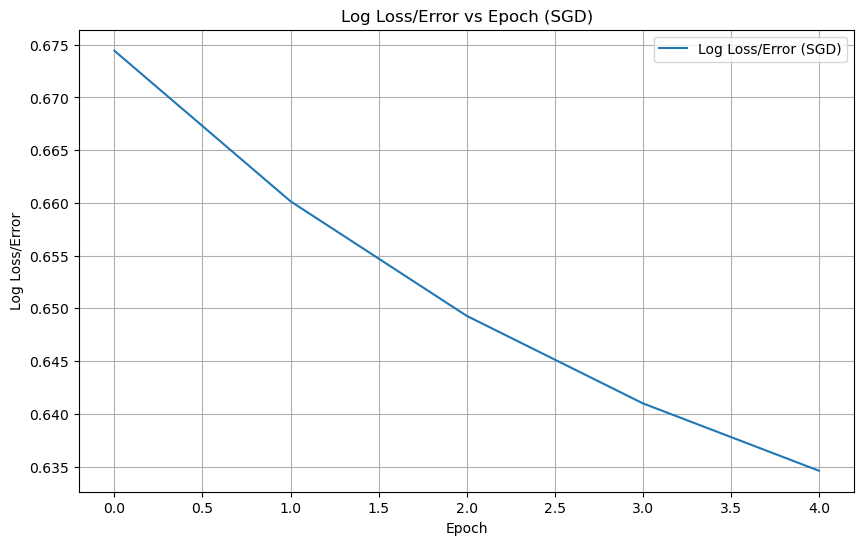

Scikit-learn B0: 0.00
Scikit-learn B1: 0.19
Scikit-learn Log Loss: 0.59


/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

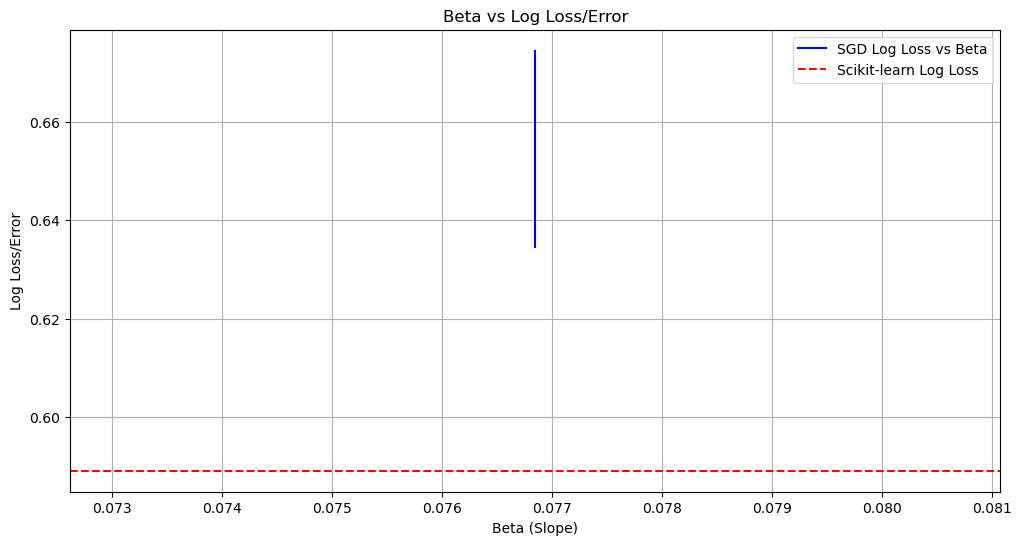

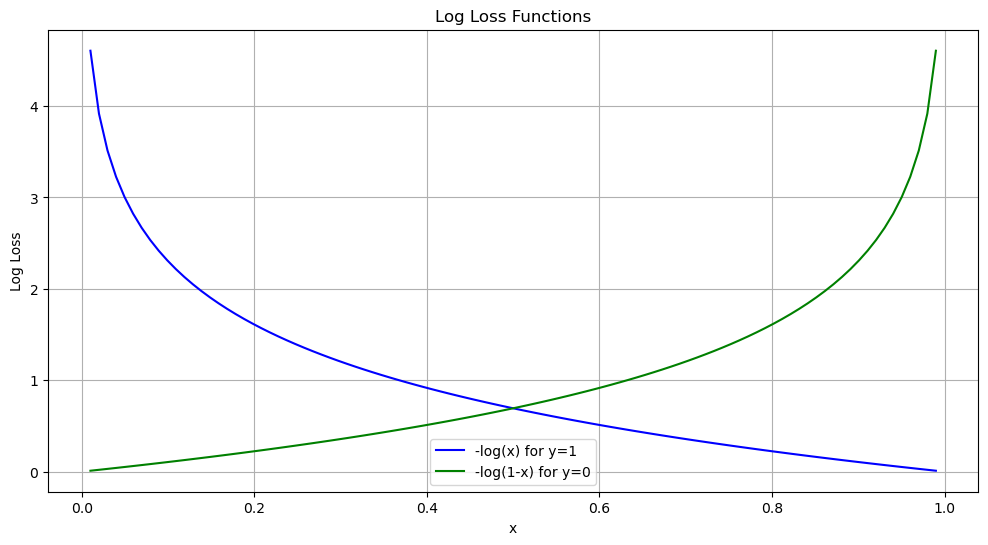

In [19]:
## Implement Stochastic Gradient Descent (SGD) for Logistic Regression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('/home/student/Documents/220962302/week 6/pass_fail.csv')

# Separate features and labels
X = data[['hours_of_study']].values
y = data['pass'].values

# Initialize parameters
B0 = 0
B1 = 0
alpha = 0.01
iterations = 60
epochs = 5

# Storage for log loss
log_losses = []

# Stochastic Gradient Descent
for epoch in range(epochs):
    for i in range(len(X)):
        xi = X[i][0]
        yi = y[i]
        
        # Calculate prediction
        z = B0 + B1 * xi
        prediction = 1 / (1 + np.exp(-z))
        
        # Calculate error
        error = yi - prediction
        
        # Update coefficients
        B0 += alpha * error * prediction * (1 - prediction)
        B1 += alpha * error * prediction * (1 - prediction) * xi
    
    # Calculate log loss for this epoch
    predictions = 1 / (1 + np.exp(-(B0 + B1 * X.flatten())))
    predictions = np.clip(predictions, 1e-15, 1 - 1e-15)
    log_loss_value = log_loss(y, predictions)
    log_losses.append(log_loss_value)

# Plot log loss/error versus epoch
plt.figure(figsize=(10, 6))
plt.plot(range(len(log_losses)), log_losses, label='Log Loss/Error (SGD)')
plt.xlabel('Epoch')
plt.ylabel('Log Loss/Error')
plt.title('Log Loss/Error vs Epoch (SGD)')
plt.legend()
plt.grid(True)
plt.show()


## Use Scikit-learn for Comparison


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model using scikit-learn
model = LogisticRegression(solver='lbfgs', max_iter=1)  # Single iteration for comparison
for epoch in range(epochs):
    model.fit(X_train, y_train)  # Fit the model
    
    # Get coefficients
    B0_sklearn = model.intercept_[0]
    B1_sklearn = model.coef_[0][0]
    
    # Get predictions and calculate log loss
    predictions_sklearn = model.predict_proba(X_test)[:, 1]
    log_loss_sklearn = log_loss(y_test, predictions_sklearn)
    
print(f"Scikit-learn B0: {B0_sklearn:.2f}")
print(f"Scikit-learn B1: {B1_sklearn:.2f}")
print(f"Scikit-learn Log Loss: {log_loss_sklearn:.2f}")



##  Plot Beta vs Log Loss/Error


# Collect beta values
betas_sgd = [B1 for _ in range(len(log_losses))]  # As beta is constant for SGD in this case
betas_sklearn = [B1_sklearn] * len(log_losses)  # Constant for scikit-learn

# Plot
plt.figure(figsize=(12, 6))

# SGD results
plt.plot(betas_sgd, log_losses, label='SGD Log Loss vs Beta', color='blue')

# Scikit-learn results
plt.axhline(y=log_loss_sklearn, color='red', linestyle='--', label='Scikit-learn Log Loss')

plt.xlabel('Beta (Slope)')
plt.ylabel('Log Loss/Error')
plt.title('Beta vs Log Loss/Error')
plt.legend()
plt.grid(True)
plt.show()

## Plot Log Loss Functions



# Generate values for x
x = np.linspace(0.01, 0.99, 100)

# Log loss functions
log_loss_y1 = -np.log(x)
log_loss_y0 = -np.log(1 - x)

# Plot
plt.figure(figsize=(12, 6))

# Plot for y=1
plt.plot(x, log_loss_y1, label='-log(x) for y=1', color='blue')

# Plot for y=0
plt.plot(x, log_loss_y0, label='-log(1-x) for y=0', color='green')

# Combined graph
plt.xlabel('x')
plt.ylabel('Log Loss')
plt.title('Log Loss Functions')
plt.legend()
plt.grid(True)
plt.show()

# Q5

Positive Slope Dataset - Final Slope (B1): 0.84
Negative Slope Dataset - Final Slope (B1): 0.73


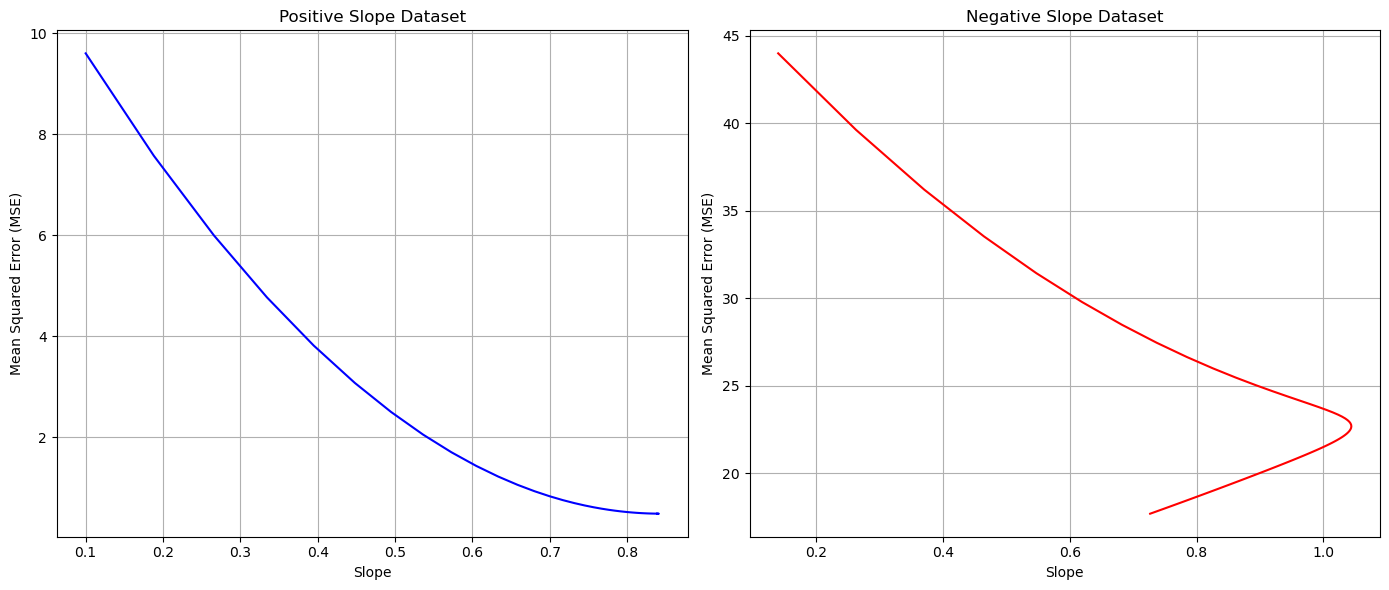

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define Gradient Descent function
def gradient_descent(x, y, learning_rate=0.01, num_iterations=100):
    m = len(x)  # Number of data points
    X = np.vstack([np.ones(m), x]).T  # Add a column of ones for the intercept term
    theta = np.zeros(X.shape[1])  # Initialize coefficients
    slope_values = []
    mse_values = []

    for _ in range(num_iterations):
        predictions = X @ theta
        errors = predictions - y
        gradient = (X.T @ errors) / m
        theta -= learning_rate * gradient
        mse = np.mean(errors ** 2)
        slope_values.append(theta[1])
        mse_values.append(mse)

    return slope_values, mse_values, theta

# Datasets
x_positive = np.array([1, 2, 4, 3, 5])
y_positive = np.array([1, 3, 3, 2, 5])

x_negative = np.array([1, 2, 3, 4, 5])
y_negative = np.array([10, 8, 6, 4, 2])

# Apply Gradient Descent
slope_positive, mse_positive, theta_positive = gradient_descent(x_positive, y_positive)
slope_negative, mse_negative, theta_negative = gradient_descent(x_negative, y_negative)

# Print final coefficients
print(f"Positive Slope Dataset - Final Slope (B1): {theta_positive[1]:.2f}")
print(f"Negative Slope Dataset - Final Slope (B1): {theta_negative[1]:.2f}")

# Plot Slope vs MSE for Positive Slope Dataset
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(slope_positive, mse_positive, color='blue')
plt.xlabel('Slope')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Positive Slope Dataset')
plt.grid(True)

# Plot Slope vs MSE for Negative Slope Dataset
plt.subplot(1, 2, 2)
plt.plot(slope_negative, mse_negative, color='red')
plt.xlabel('Slope')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Negative Slope Dataset')
plt.grid(True)

plt.tight_layout()
plt.show()


# Additional Questions
# Q1

Epoch 1: MSE = 2.3813
Epoch 2: MSE = 2.1811
Epoch 3: MSE = 2.1604
Epoch 4: MSE = 2.2816
Epoch 5: MSE = 2.2225
Epoch 6: MSE = 2.1762
Epoch 7: MSE = 2.3095
Epoch 8: MSE = 2.2256
Epoch 9: MSE = 2.2235
Epoch 10: MSE = 2.2244
Epoch 11: MSE = 2.2335
Epoch 12: MSE = 2.2907
Epoch 13: MSE = 2.3313
Epoch 14: MSE = 2.4417
Epoch 15: MSE = 2.2689
Epoch 16: MSE = 2.2143
Epoch 17: MSE = 2.1829
Epoch 18: MSE = 2.3707
Epoch 19: MSE = 2.1764
Epoch 20: MSE = 2.3154
Epoch 21: MSE = 2.2095
Epoch 22: MSE = 2.3922
Epoch 23: MSE = 2.4259
Epoch 24: MSE = 2.2917
Epoch 25: MSE = 2.1914
Epoch 26: MSE = 2.3042
Epoch 27: MSE = 2.1642
Epoch 28: MSE = 2.2815
Epoch 29: MSE = 2.2845
Epoch 30: MSE = 2.3865
Epoch 31: MSE = 2.1759
Epoch 32: MSE = 2.2636
Epoch 33: MSE = 2.1586
Epoch 34: MSE = 2.2108
Epoch 35: MSE = 2.2285
Epoch 36: MSE = 2.2380
Epoch 37: MSE = 2.3392
Epoch 38: MSE = 2.2598
Epoch 39: MSE = 2.1637
Epoch 40: MSE = 2.2930
Epoch 41: MSE = 2.1011
Epoch 42: MSE = 2.4442
Epoch 43: MSE = 2.2248
Epoch 44: MSE = 2.31

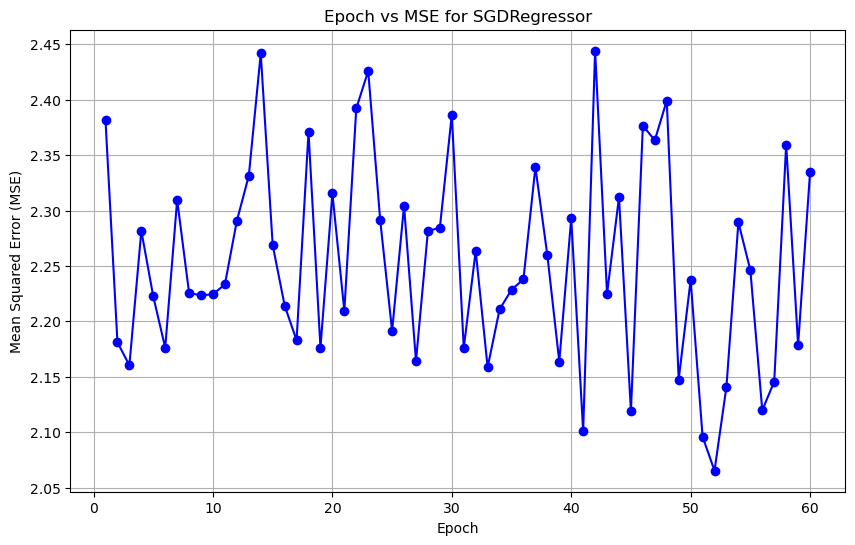

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('/home/student/Documents/220962302/week 6/salary_experience.csv')
X = data['experience'].values.reshape(-1, 1)  # Reshape for sklearn
y = data['salary'].values

# Initialize SGDRegressor
sgd_regressor = SGDRegressor(max_iter=1, tol=None, learning_rate='constant', eta0=0.01)

# List to store the error values for each epoch
errors = []

# Number of epochs
num_epochs = 60

# Iterate over the number of epochs
for epoch in range(num_epochs):
    # Fit the model for one epoch
    sgd_regressor.fit(X, y)
    
    # Predict and calculate error
    y_pred = sgd_regressor.predict(X)
    mse = mean_squared_error(y, y_pred)
    errors.append(mse)
    
    # Print progress
    print(f"Epoch {epoch + 1}: MSE = {mse:.4f}")

# Get the final coefficients
b0_sgd = sgd_regressor.intercept_[0]
b1_sgd = sgd_regressor.coef_[0]

print(f"Final Intercept (B0): {b0_sgd:.2f}")
print(f"Final Slope (B1): {b1_sgd:.2f}")

# Plotting the error vs. epoch
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), errors, marker='o', linestyle='-', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Epoch vs MSE for SGDRegressor')
plt.grid(True)
plt.show()

# Q2

Positive Slope Dataset - Final Intercept (B0): -0.05
Positive Slope Dataset - Final Slope (B1): 0.34
Negative Slope Dataset - Final Intercept (B0): 0.05
Negative Slope Dataset - Final Slope (B1): -0.34


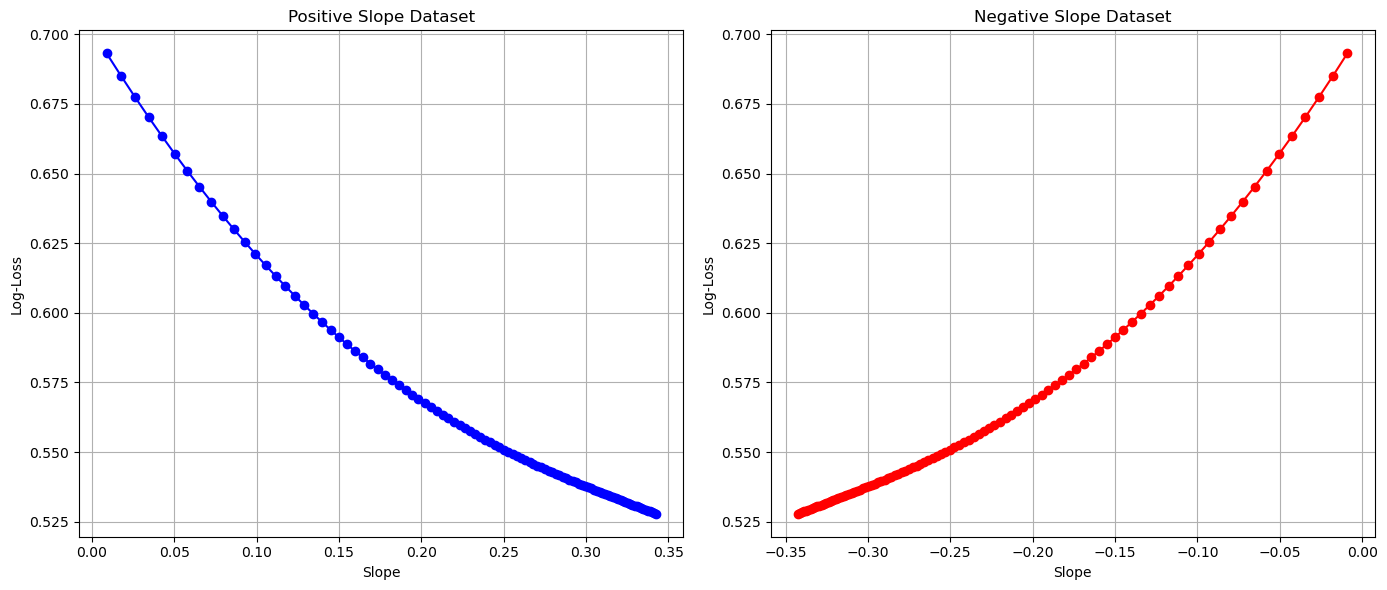

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define gradient descent function for logistic regression
def logistic_regression_gradient_descent(x, y, learning_rate=0.01, num_iterations=100):
    m = len(x)
    X = np.vstack([np.ones(m), x]).T  # Add a column of ones for the intercept term
    theta = np.zeros(X.shape[1])  # Initialize coefficients
    slope_values = []
    log_losses = []

    for _ in range(num_iterations):
        predictions = sigmoid(X @ theta)
        errors = predictions - y
        gradient = (X.T @ errors) / m
        theta -= learning_rate * gradient
        log_loss = -np.mean(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))
        slope_values.append(theta[1])
        log_losses.append(log_loss)

    return slope_values, log_losses, theta

# Define datasets
x_positive = np.array([1, 2, 3, 4, 5])
y_positive = np.array([0, 0, 1, 1, 1])  # Positive slope

x_negative = np.array([1, 2, 3, 4, 5])
y_negative = np.array([1, 1, 0, 0, 0])  # Negative slope

# Apply gradient descent
slope_positive, log_loss_positive, theta_positive = logistic_regression_gradient_descent(x_positive, y_positive)
slope_negative, log_loss_negative, theta_negative = logistic_regression_gradient_descent(x_negative, y_negative)

# Print final coefficients
print(f"Positive Slope Dataset - Final Intercept (B0): {theta_positive[0]:.2f}")
print(f"Positive Slope Dataset - Final Slope (B1): {theta_positive[1]:.2f}")
print(f"Negative Slope Dataset - Final Intercept (B0): {theta_negative[0]:.2f}")
print(f"Negative Slope Dataset - Final Slope (B1): {theta_negative[1]:.2f}")

# Plot Slope vs Log-Loss for Positive Slope Dataset
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(slope_positive, log_loss_positive, marker='o', linestyle='-', color='blue')
plt.xlabel('Slope')
plt.ylabel('Log-Loss')
plt.title('Positive Slope Dataset')
plt.grid(True)

# Plot Slope vs Log-Loss for Negative Slope Dataset
plt.subplot(1, 2, 2)
plt.plot(slope_negative, log_loss_negative, marker='o', linestyle='-', color='red')
plt.xlabel('Slope')
plt.ylabel('Log-Loss')
plt.title('Negative Slope Dataset')
plt.grid(True)

plt.tight_layout()
plt.show()